In [2]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

# Functions

In [3]:
# to select specific allele we are counting mismatches for
def select_allele(dataset,allele):
    df=dataset.set_index(dataset.columns[0])
    mask = df.apply(lambda col: col.str.contains(allele).any(),
                    axis=0)
    df=df.loc[: , mask]
    df=df.reset_index()
    df=df.iloc[: , :3]
    df=df.fillna(allele+'*00:00')
    df.columns=['Run',allele,allele+'.1']
    return df 

In [4]:
# to select specific allele we are counting mismatches for
def select_allele_d5(dataset,allele):
    df=dataset.set_index(dataset.columns[0])
    mask = df.apply(lambda col: col.str.contains(allele).any(),
                    axis=0)
    df=df.loc[: , mask]
    df=df.reset_index()
    df=df.fillna(allele+'*00:00')
    df.columns=['Run',allele]
    return df 

In [5]:
#counts a specific number of mismatches for a allele between a prediction set and gs 
def count_mismatch(pred,gs,allele):
    mismatch_count=0
    match=0
    pred=pd.read_csv('../results/standard/'+pred+'_d'+gs+'.csv')
    gs=pd.read_csv('../datasets/'+gs+'_gs.csv')
    pred=select_allele(pred,allele)
    gs=select_allele(gs,allele)
    if allele=='A' or allele=='B' or allele=='C':
        index_char=7
    elif allele=='DRB1' or allele=='DQB1':
        index_char=10
    for index_i,row_i in pred.iterrows():
        for index_j, row_j in gs.iterrows():
            if row_i[0]==row_j[0]:
                if row_i[allele][:index_char] != row_j[allele] and row_i[allele][:index_char] != row_j[allele+'.1']:
                    #print(row_i[allele][:index_char],row_j[allele],row_j[allele+'.1'],row_i[0],row_j[0])
                    mismatch_count+=1 
                elif row_i[allele+'.1'][:index_char] != row_j[allele] and row_i[allele+'.1'][:index_char] != row_j[allele+'.1']:
                    mismatch_count+=1
                    #print(row_i[allele+'.1'][:index_char],row_j[allele],row_j[allele+'.1'],row_i[0],row_j[0])
                else:
                    match+=1
                
    return mismatch_count
    #print(match)

In [6]:
count_mismatch('hlavbseq','3','DRB1')

55

In [31]:
#counts a specific number of mismatches for a allele between a prediction set and gs 
def count_mismatch_d2(pred,gs,allele):
    mismatch_count=0
    match=0
    pred=pd.read_csv('../results/standard/'+pred+'_d'+gs+'.csv')
    gs=pd.read_csv('../datasets/'+gs+'_gs.csv')
    pred=select_allele(pred,allele)
    gs=select_allele(gs,allele)
    if allele=='A' or allele=='B' or allele=='C':
        index_char=7
    elif allele=='DRB1' or allele=='DQB1':
        index_char=10
    for index_i,row_i in pred.iterrows():
        for index_j, row_j  in gs.iterrows():
            if row_i[0]==row_j[0]:
                if '/' in row_j[allele] or '/' in row_j[allele+'.1']:
                    gs_1=row_j[allele].split('/')
                    gs_2=row_j[allele+'.1'].split('/')
                    gs_1[:]=(elem[:index_char] for elem in gs_1)
                    gs_2[:]=(elem[:index_char] for elem in gs_2)
                    if row_i[allele][:index_char] not in gs_1 and row_i[allele][:index_char] not in gs_2:
                        #print(row_i[allele][:index_char],gs_1,gs_2,row_i[0],row_j[0])
                        mismatch_count+=1
                    if row_i[allele+'.1'][:index_char] not in gs_1 and row_i[allele+'.1'][:index_char] not in gs_2:
                        #print (row_i[allele+'.1'][:index_char],gs_1,gs_2,row_i[0],row_j[0])
                        mismatch_count+=1
    return mismatch_count

In [33]:
count_mismatch_d2('phlat','2','DQB1')

164

In [8]:
#counts a specific number of mismatches for a allele between a prediction set and gs 
def count_mismatch_d5(pred,gs,allele):
    mismatch_count=0
    match=0
    pred=pd.read_csv('../results/standard/'+pred+'_d'+gs+'.csv')
    gs=pd.read_csv('../datasets/'+gs+'_gs.csv')
    pred=select_allele(pred,allele)
    gs=select_allele_d5(gs,allele)
    if allele=='A' or allele=='B' or allele=='C':
        index_char=7
    elif allele=='DRB1' or allele=='DQB1':
        index_char=10
    for index_i,row_i in pred.iterrows():
        for index_j, row_j  in gs.iterrows():
            if row_i[0]==row_j[0]:
                if row_i[allele][:index_char] != row_j[allele]:
                    #print(row_i[allele][:index_char],row_j[allele],row_i[0],row_j[0])
                    mismatch_count+=1 
                elif row_i[allele+'.1'][:index_char] != row_j[allele]:
                    #print(row_i[allele+'.1'][:index_char],row_j[allele],row_i[0],row_j[0])
                    mismatch_count+=1 
                
    return mismatch_count

In [9]:
#counts a specific number of mismatches for a allele between a prediction set and gs 
def count_mismatch_d6(pred,gs,allele):
    mismatch_count=0
    match=0
    pred=pd.read_csv('../results/standard/'+pred+'_d'+gs+'.csv')
    gs=pd.read_csv('../datasets/'+gs+'_gs.csv')
    pred=select_allele(pred,allele)
    if allele=='A' or allele=='B' or allele=='C':
        index_char=7
    elif allele=='DRB1' or allele=='DQB1':
        index_char=10
    for index_i,row_i in pred.iterrows():
        for index_j, row_j  in gs.iterrows():
            if row_i[0]==row_j[0]:
                if row_i[allele][:index_char] != row_j[allele]:
                    #print(row_i[allele][:index_char],row_j[allele],row_i[0],row_j[0])
                    mismatch_count+=1 
                elif row_i[allele+'.1'][:index_char] != row_j[allele]:
                    #print(row_i[allele+'.1'][:index_char],row_j[allele],row_i[0],row_j[0])
                    mismatch_count+=1 
                
    return mismatch_count

In [10]:
def mismatch_df(tool_list,gs_list,allele_list):
    df=[]
    for tool in tool_list:
        for gs in gs_list:
            for allele in allele_list:
                if gs=='2':
                    mismatch=count_mismatch_d2(tool,gs,allele)
                elif gs=='5':
                    mismatch=count_mismatch_d5(tool,gs,allele)
                elif gs=='6':
                    mismatch=count_mismatch_d6(tool,gs,allele)
                else:
                    mismatch=count_mismatch(tool,gs,allele)
                df.append([tool,gs,allele,mismatch])
    df=pd.DataFrame(df, columns=['Tool','GS','Allele','Mismatch'])
    return df

In [13]:
pred='arcas'
gs='3'
allele='A'

In [27]:
mismatch_count=0
match=0
allele='A'
pred=pd.read_csv('../results/standard/hlavbseq_d2.csv')
gs=pd.read_csv('../datasets/2_gs.csv')
gs

,Run,A,A.1,B,B.1,C,C.1,DRB1,DRB1.1,DQB1,DQB1.1
0,ERR188021,A*01:01/A*01:04/A*01:22/A*01:32/A*01:34/A*01:37,A*24:02/A*24:09/A*24:11/A*24:40/A*24:76/A*24:7...,B*41:02:00,B*1/B*2/B*1900 9:01,C*06:02,C*17:01/C*17:02/C*17:03,DRB1*13:03,DRB1*04:07,DQB1*03:01/DQB1*03:09/DQB1*03:19/DQB1*03:21/DQ...,DQB1*03:01/DQB1*03:09/DQB1*03:19/DQB1*03:21/DQ...
1,ERR188023,A*02:01/A*02:09/A*02:43/A*02:66/A*02:75/A*02:8...,A*30:01/A*30:24,B*13:02,B*56:01/B*56:24,C*01:02/C*01:25,C*06:02,DRB1*04:01,DRB1*07:01,DQB1*02:01/DQB1*02:02/DQB1*02:04,DQB1*03:02
2,ERR188025,A*03:01/A*03:20/A*03:21/A*03:26/A*03:37/A*03:45,A*31:01/A*31:14/A*31:23,B*44:02/B*44:19/B*44:27/B*44:66,B*51:01/B*51:11/B*51:30/B*51:32/B*51:48/B*51:51,C*01:02/C*01:25,C*07:04/C*07:11,DRB1*16:01,DRB1*13:01,DQB1*05:02,DQB1*06:03
3,ERR188026,A*02:05/A*02:17,A*24:02/A*24:09/A*24:11/A*24:40/A*24:76/A*24:7...,B*15:17,B*55:01:00,C*01:02/C*01:25,C*07:01/C*07:06/C*07:18/C*07:52,DRB1*11:01,DRB1*13:02,DQB1*03:01/DQB1*03:09/DQB1*03:19/DQB1*03:21/DQ...,DQB1*06:04/DQB1*06:34
4,ERR188027,A*01:01,A*02:01,B*08:01,B*57:01:00,C*07:01/C*07:06,C*06:02,DRB1*03:01,DRB1*07:01,DQB1*02:01,DQB1*03:03
...,...,...,...,...,...,...,...,...,...,...,...
485,ERR205017,A*30:02:00,A*30:02:00,B*15:03,B*57:03:00,C*02:02,C*08:02,DRB1*13:03,DRB1*07:01,DQB1*02:01,DQB1*02:01
486,ERR205019,A*24:24:00,A*74:01:00,B*14:03,B*58:01:00,C*07:01,C*08:02,DRB1*13:01,DRB1*07:01,DQB1*05:01,DQB1*02:01
487,ERR205021,A*03:01/A*03:20/A*03:21/A*03:26/A*03:37/A*03:45,A*33:01:00,B*15:10,B*58:01/B*58:11,C*03:02,C*08:04,DRB1*03:01,DRB1*13:01,DQB1*03:01/DQB1*03:09/DQB1*03:19/DQB1*03:21/DQ...,DQB1*06:03
488,ERR205022,A*01:01,A*11:01,B*51:01:00,B*50:01:00,C*15:02,C*06:02,DRB1*04:07,DRB1*07:01,DQB1*03:01,DQB1*02:01


In [29]:
mismatch_count=0
match=0
allele='A'
pred=pd.read_csv('../results/standard/hlavbseq_d2.csv')
gs=pd.read_csv('../datasets/2_gs.csv')
pred=select_allele(pred,allele)
gs=select_allele(gs,allele)
if allele=='A' or allele=='B' or allele=='C':
    index_char=7
elif allele=='DRB1' or allele=='DQB1':
    index_char=10
for index_i,row_i in pred.iterrows():
    for index_j, row_j  in gs.iterrows():
        if row_i[0]==row_j[0]:
            if '/' in row_j[allele] or '/' in row_j[allele+'.1']:
                gs_1=row_j[allele].split('/')
                gs_2=row_j[allele+'.1'].split('/')
                gs_1[:]=(elem[:index_char] for elem in gs_1)
                gs_2[:]=(elem[:index_char] for elem in gs_2)
                if row_i[allele][:index_char] not in gs_1 and row_i[allele][:index_char] not in gs_2:
                    print(row_i[allele][:index_char],gs_1,gs_2,row_i[0],row_j[0])
                    mismatch_count+=1
                if row_i[allele+'.1'][:index_char] not in gs_1 and row_i[allele+'.1'][:index_char] not in gs_2:
                    print (row_i[allele+'.1'][:index_char],gs_1,gs_2,row_i[0],row_j[0])
                    mismatch_count+=1
print(mismatch_count)



                
                

A*02:02 ['A*02:05', 'A*02:17'] ['A*24:02', 'A*24:09', 'A*24:11', 'A*24:40', 'A*24:76', 'A*24:79', 'A*24:83'] ERR188026 ERR188026
A*24:02 ['A*23:01', 'A*23:07', 'A*23:17', 'A*23:18', 'A*23:20'] ['A*36:01'] ERR188030 ERR188030
A*36:03 ['A*23:01', 'A*23:07', 'A*23:17', 'A*23:18', 'A*23:20'] ['A*36:01'] ERR188030 ERR188030
A*31:11 ['A*31:01', 'A*31:14', 'A*31:23'] ['A*68:01'] ERR188053 ERR188053
A*26:01 ['A*03:01', 'A*03:20', 'A*03:21', 'A*03:26', 'A*03:37', 'A*03:45'] ['A*25:01', 'A*25:07'] ERR188117 ERR188117
A*68:35 ['A*03:01', 'A*03:20', 'A*03:21', 'A*03:26', 'A*03:37', 'A*03:45'] ['A*68:01', 'A*68:11', 'A*68:33'] ERR188169 ERR188169
A*68:35 ['A*01:02'] ['A*68:01', 'A*68:11', 'A*68:33'] ERR188197 ERR188197
A*30:10 ['A*30:01', 'A*30:24'] ['A*33:03', 'A*33:15', 'A*33:25'] ERR188284 ERR188284
A*02:02 ['A*01:01', 'A*01:04', 'A*01:22', 'A*01:32', 'A*01:34', 'A*01:37'] ['A*02:05', 'A*02:17'] ERR188328 ERR188328
A*30:70 ['A*11:01', 'A*11:21'] ['A*30:02'] ERR188342 ERR188342
A*26:01 ['A*01:01'

In [24]:
gs

,Run,A,A.1
0,0,A*01:01/A*01:04/A*01:22/A*01:32/A*01:34/A*01:37,A*24:02/A*24:09/A*24:11/A*24:40/A*24:76/A*24:7...
1,1,A*02:01/A*02:09/A*02:43/A*02:66/A*02:75/A*02:8...,A*30:01/A*30:24
2,2,A*03:01/A*03:20/A*03:21/A*03:26/A*03:37/A*03:45,A*31:01/A*31:14/A*31:23
3,3,A*02:05/A*02:17,A*24:02/A*24:09/A*24:11/A*24:40/A*24:76/A*24:7...
4,4,A*01:01,A*02:01
...,...,...,...
485,485,A*30:02:00,A*30:02:00
486,486,A*24:24:00,A*74:01:00
487,487,A*03:01/A*03:20/A*03:21/A*03:26/A*03:37/A*03:45,A*33:01:00
488,488,A*01:01,A*11:01


In [12]:
count_mismatch_d2("arcas",'2','A')

In [44]:
test="A*02:01"
list=['A*02:01:00', 'A*02:09', 'A*02:43', 'A*02:66', 'A*02:75', 'A*02:83', 'A*02:89', 'A*02:97', 'A*02:13', 'A*02:14']
list[:] = (elem[:7] for elem in list)
if test in list:
    print('match')


match


In [ ]:
for i in range(0,len(gold_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:7] for elem in allele_list_next)

      #print(allele_list_curr)

      if pred_set[i] in allele_list_curr:
        hit4 +=1 
      elif pred_set[i] in allele_list_prev:
        hit4 += 1
      elif pred_set[i] in allele_list_next:
        hit4 += 1
    else:
      if gold_set[i][0:7] == pred_set[i]:
        hit4 +=1 
      elif pred_set[i] == gold_set[i-1][0:7]:
        hit4 += 1
      elif pred_set[i] == gold_set[i+1][0:7]:
        hit4 += 1
  except:
    pass

# Mismatch

## D1 Mismatch

In [34]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
gs_list=["1"]
allele_list=["A","B","C"]
d1=mismatch_df(tool_list,gs_list,allele_list)
d1


,Tool,GS,Allele,Mismatch
0,arcas,1,A,18
1,arcas,1,B,37
2,arcas,1,C,19
3,hlaforest,1,A,5
4,hlaforest,1,B,11
5,hlaforest,1,C,20
6,hlavbseq,1,A,6
7,hlavbseq,1,B,16
8,hlavbseq,1,C,8
9,optitype,1,A,4


## D2 Mismatch

In [35]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
gs_list=["2"]
allele_list=["A","B","C"]
d2_class1=mismatch_df(tool_list,gs_list,allele_list)
d2_class1


,Tool,GS,Allele,Mismatch
0,arcas,2,A,59
1,arcas,2,B,7
2,arcas,2,C,25
3,hlaforest,2,A,39
4,hlaforest,2,B,141
5,hlaforest,2,C,90
6,hlavbseq,2,A,18
7,hlavbseq,2,B,88
8,hlavbseq,2,C,52
9,optitype,2,A,2


In [36]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
gs_list=["2"]
allele_list=["DRB1"]
d2_drb=mismatch_df(tool_list,gs_list,allele_list)
d2_drb

,Tool,GS,Allele,Mismatch
0,arcas,2,DRB1,0
1,hlaforest,2,DRB1,1
2,hlavbseq,2,DRB1,64
3,phlat,2,DRB1,4
4,rna2hla,2,DRB1,2
5,seq2hla,2,DRB1,2


In [37]:
tool_list=["arcas","hlaforest","hlavbseq","phlat"]
gs_list=["2"]
allele_list=["DQB1"]
d2_dqb=mismatch_df(tool_list,gs_list,allele_list)
d2_dqb

,Tool,GS,Allele,Mismatch
0,arcas,2,DQB1,10
1,hlaforest,2,DQB1,22
2,hlavbseq,2,DQB1,0
3,phlat,2,DQB1,164


## D3 Mismatch

In [38]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
gs_list=["3"]
allele_list=["DRB1"]
d3=mismatch_df(tool_list,gs_list,allele_list)
d3

,Tool,GS,Allele,Mismatch
0,arcas,3,DRB1,5
1,hlaforest,3,DRB1,24
2,hlavbseq,3,DRB1,55
3,phlat,3,DRB1,12
4,rna2hla,3,DRB1,38
5,seq2hla,3,DRB1,52


## D4 Mismatch

In [39]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
gs_list=["4"]
allele_list=["DRB1"]
d4=mismatch_df(tool_list,gs_list,allele_list)
d4

,Tool,GS,Allele,Mismatch
0,arcas,4,DRB1,12
1,hlaforest,4,DRB1,6
2,hlavbseq,4,DRB1,11
3,phlat,4,DRB1,3
4,rna2hla,4,DRB1,10
5,seq2hla,4,DRB1,10


## D5 Mismatch

In [40]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
gs_list=["5"]
allele_list=["A","B"]
d5=mismatch_df(tool_list,gs_list,allele_list)
d5

,Tool,GS,Allele,Mismatch
0,arcas,5,A,2
1,arcas,5,B,1
2,hlaforest,5,A,4
3,hlaforest,5,B,3
4,hlavbseq,5,A,1
5,hlavbseq,5,B,1
6,optitype,5,A,4
7,optitype,5,B,1
8,phlat,5,A,3
9,phlat,5,B,1


## D6 Mismatch

In [41]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
gs_list=["6"]
allele_list=["C"]
d6=mismatch_df(tool_list,gs_list,allele_list)
d6

,Tool,GS,Allele,Mismatch
0,arcas,6,C,0
1,hlaforest,6,C,0
2,hlavbseq,6,C,1
3,optitype,6,C,5
4,phlat,6,C,0
5,rna2hla,6,C,2
6,seq2hla,6,C,2


# Plots

In [42]:
df=pd.concat([d1,d2_class1,d2_dqb,d2_drb,d3,d4,d5,d6])
df

,Tool,GS,Allele,Mismatch
0,arcas,1,A,18
1,arcas,1,B,37
2,arcas,1,C,19
3,hlaforest,1,A,5
4,hlaforest,1,B,11
...,...,...,...,...
2,hlavbseq,6,C,1
3,optitype,6,C,5
4,phlat,6,C,0
5,rna2hla,6,C,2


In [135]:
df['Allele'].unique()

array(['A', 'B', 'C', 'DQB1', 'DRB1'], dtype=object)

/home/curryofdoom/anaconda3/envs/panel/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


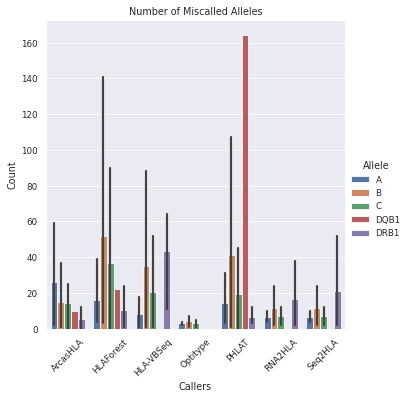

In [43]:
sns.set(rc={'figure.figsize':(20,200)})
sns.set_context("paper")
sns.color_palette("pastel")
ax = sns.factorplot(x='Tool',y='Mismatch',hue='Allele',data=df,kind='bar').set(title="Number of Miscalled Alleles")
ax.set_xticklabels(['ArcasHLA','HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','Seq2HLA'], rotation=45)
plt.xlabel("Callers")
plt.ylabel("Count")
sns.despine()
plt.savefig('../Figures/miscalled_alleles.png', bbox_inches="tight",dpi=300)
